In [2]:
# some default settings for plots 
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [4]:
from util.gamap_colormap import WhGrYlRd

In [5]:
def plot_layer(variable, layer):
    fig = plt.figure(figsize=[8, 4])
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(linestyle='--')
    
    ds_mean[variable].isel(time=0, lev=layer).plot(ax=ax, cmap=WhGrYlRd)
    ax.set_title(variable+f'; lev={layer}')
    
    # recall that Python uses indentation to determine the end of a function or a "for" loop
    # there is no "end" expression

In [6]:
# load data
fname = '/geos/u73/msadiq/jupyter/SpeciesConc.201801.nc'
ds = xr.open_dataset(fname)

varnames = list(ds.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
nvar = len(varnames)  # how many elements in the list?
print(nvar, varnames)

32 ['hyam', 'hybm', 'hyai', 'hybi', 'P0', 'AREA', 'SpeciesConc_CO2Tag22', 'SpeciesConc_CO2Tag21', 'SpeciesConc_CO2Tag20', 'SpeciesConc_CO2Tag19', 'SpeciesConc_CO2Tag18', 'SpeciesConc_CO2Tag17', 'SpeciesConc_CO2Tag16', 'SpeciesConc_CO2Tag15', 'SpeciesConc_CO2Tag14', 'SpeciesConc_CO2Tag13', 'SpeciesConc_CO2Tag12', 'SpeciesConc_CO2Tag11', 'SpeciesConc_CO2Tag10', 'SpeciesConc_CO2Tag9', 'SpeciesConc_CO2Tag8', 'SpeciesConc_CO2Tag7', 'SpeciesConc_CO2Tag6', 'SpeciesConc_CO2Tag5', 'SpeciesConc_CO2Tag4', 'SpeciesConc_CO2Tag3', 'SpeciesConc_CO2Tag2', 'SpeciesConc_CO2Tag1', 'SpeciesConc_CO2', 'SpeciesConc_CO2ff', 'SpeciesConc_CO2bf', 'SpeciesConc_CO2oc']


In [7]:
ds_mean = ds.mean(dim='record')*1e6  # mol/mol to ppm

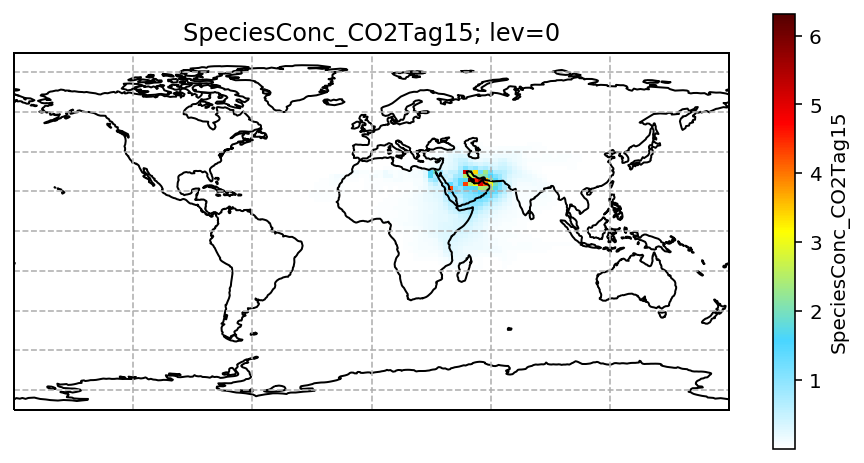

In [8]:
varname = 'SpeciesConc_CO2Tag15'
ilevel = 0
plot_layer(variable = varname, layer = ilevel)

In [30]:
def zonal(variable, month):
    # load data
    fname = '/geos/u73/msadiq/jupyter/SpeciesConc.20180' + str(month) + '.nc'
    ds = xr.open_dataset(fname)
    
    ds_mean = ds.mean(dim='record')*1e6  # mol/mol to ppm
    
    ds_mean['lev'] = np.arange(47)  # overwrite the vertical coordinate by integer indices
    lon_mean = ds_mean[variable].mean(dim='lon')
    lon_mean.plot(cmap=WhGrYlRd, vmax=0.5)

In [10]:
from ipywidgets import interact, IntSlider, SelectionSlider, Dropdown

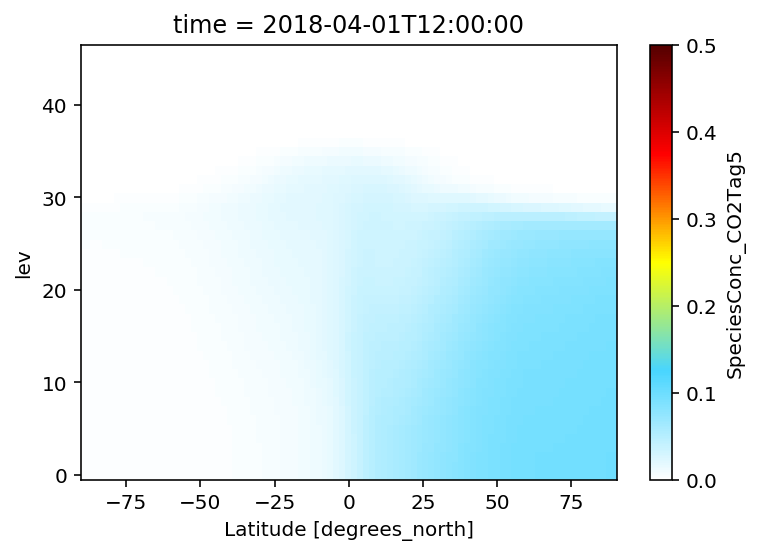

In [33]:
all_var_names = varnames[6:]
all_months = np.arange(4)+1
all_months
zonal(variable = 'SpeciesConc_CO2Tag5', month = 4)

In [12]:
#interact(zonal, 
#         variable=Dropdown(options=varnames[6:]),
#         month=Dropdown(options= all_months)
         #l=IntSlider(min=0, max=46, step=1, continuous_update=False),
#        );